In [1]:
# Import the necessary packages and data
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

In [2]:
times = []
for i in wq_df['Sample Time']:
    try:
        times.append(datetime.strptime(i, '%I:%M%p').time())
    except:
        times.append(np.nan)
wq_df['Sample Time'] = times

There are 7 columns that do not start being measured until 2005. I am going to drop those columns as well.

In [3]:
drop_cols = []
for col in wq_df:
    observation_df = wq_df[wq_df[col].notnull()]
    if observation_df['Sample Date'].min().year > 2002:
        drop_cols.append(col)
print(drop_cols)
wq_df = wq_df.drop(columns=drop_cols)

['Top Fluorometer (mg/m3)', 'Bottom Fluorometer mg/m3', 'Top Sample Photosysthetically Active Radiation Reference (400-700nm light (uE/S)', 'Top Sample Par (uE/S m2)', 'Bottom Sample Par uE/S (uE/S m2)', 'Oxidation Reduction Potential (mV) Top Sample', 'Oxidation Reduction Potential (mV) Bottom Sample']


I will now examine the descriptive statistics of each column to identify values that are unexpectedly high or low.

In [4]:
wq_df_int = wq_df.select_dtypes(exclude=['object', 'datetime'])
wq_df_int_subset = wq_df_int.iloc[:, :10]
wq_df_int_subset.describe()

,Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),Bottom Salinity (psu),Top Conductivity (S/m),Bottom Conductivity (S/m),"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)"
count,18996.000000,17733.000000,27886.000000,18939.000000,17836.000000,18968.000000,17720.000000,18758.000000,17528.000000,16217.000000
mean,18.703483,18.002141,28.630030,3.380010,32.244005,22.866737,24.809579,3.837574,4.090200,6.851332
std,6.801709,6.523780,21.298745,0.749955,20.358388,5.269741,3.794550,4.396670,4.665498,2.871964
min,-1.740000,-1.870000,0.020000,0.700000,1.000000,0.120000,0.200000,0.020000,0.000000,-1.120000
25%,15.737500,15.000000,14.000000,3.000000,17.000000,21.160000,23.060000,2.730000,2.980000,5.080000
50%,21.190000,20.340000,21.000000,3.000000,25.000000,24.060000,25.240000,3.370000,3.500000,6.410000
75%,23.570000,22.830000,40.000000,4.000000,43.000000,26.220000,27.270000,3.820000,3.900000,8.080000
max,30.010000,29.230000,230.000000,12.000000,107.000000,34.760000,44.730000,43.960000,62.560000,28.560000


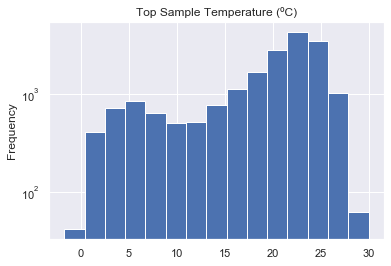

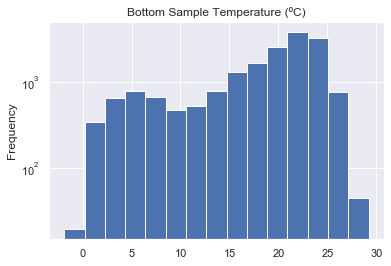

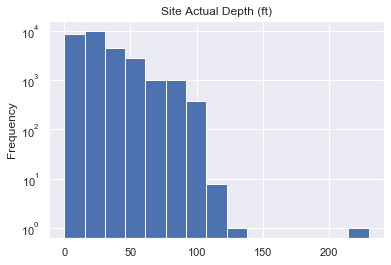

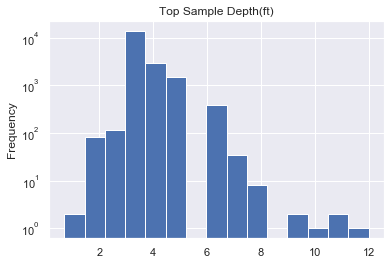

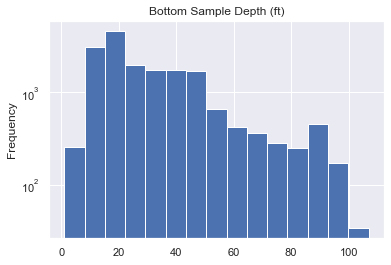

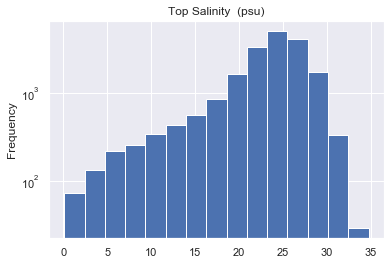

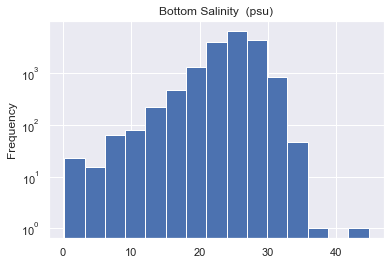

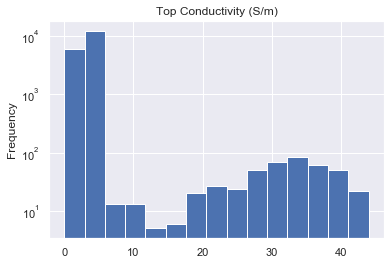

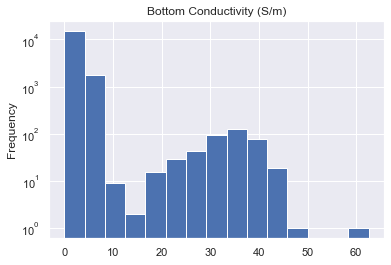

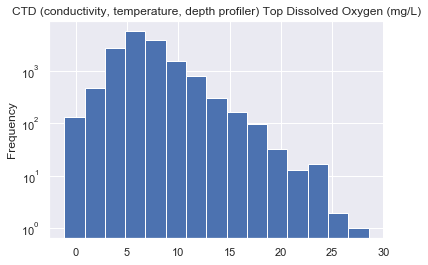

In [5]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Columns with Questionable Values:
Site Actual Depth (max), Bottom Salinity (max), Bottom Conductivity (max)

In [6]:
wq_df.nlargest(5, 'Site Actual Depth (ft)')

,Sampling Location,Sample Date,Sample Time,Weather Condition (Dry or Wet),Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),...,Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L),Top Dissolved Organic Carbon (mg/L),Long,Lat
26577,E6,2018-05-24,13:05:00,D,15.18,13.95,230.0,3.0,19.0,22.39,...,0.087,0.786,1.086,0.165,8.00,8.0,3.38,2.82,-73.860830,40.78550
26153,NC2,2018-06-05,09:52:00,D,18.19,17.77,129.0,3.0,16.0,21.04,...,0.092,1.234,2.340,0.237,11.00,19.0,10.00,3.01,-73.935500,40.72883
24454,E8,2019-04-03,10:52:00,D,NaN,NaN,120.2,NaN,NaN,NaN,...,0.032,0.304,0.836,0.054,5.00,NaN,2.78,2.21,-73.820500,40.80500
24741,E8,2019-03-06,11:17:00,D,NaN,NaN,120.0,NaN,NaN,NaN,...,0.032,0.560,0.161,0.101,8.00,NaN,36.20,2.23,-73.820500,40.80500
18105,E8,2007-03-19,11:28:00,W,2.51,1.57,114.0,3.0,107.0,24.59,...,0.060,0.812,0.910,0.114,5.75,5.0,12.30,3.66,-73.783667,40.80050


The max depth is almost twice as high as the next deepest location and is the only depth measurement from site `E6`. It is safe to assume that this point is an erroneous entry. After more exploration, it is clear that there was a decimal point was misplaced. The depth should be 23.0 not 230.

In [7]:
wq_df.at[26577, 'Site Actual Depth (ft)'] = 23.0

In [8]:
wq_df.nlargest(10, 'Bottom Salinity  (psu)')['Bottom Salinity  (psu)']

17051    44.73
19630    36.12
19157    35.34
202      35.23
19198    34.94
6455     34.78
3666     34.65
18527    34.62
5112     34.57
7096     34.30
Name: Bottom Salinity  (psu), dtype: float64

While the maximum Bottom Salinity value is high, it does not appear to be an input error so I will keep it.

In [9]:
wq_df.nlargest(10, 'Bottom Conductivity (S/m)')['Bottom Conductivity (S/m)']

17051    62.56
202      49.38
17208    43.66
22574    43.59
21503    43.47
11085    43.38
21788    43.32
72       43.04
2637     43.04
710      43.00
Name: Bottom Conductivity (S/m), dtype: float64

While the maximum Bottom Conductivity value is high, it does not appear to be an input error so I will keep it. It is from the same sampling event as the max Bottom Salinity value.

In [10]:
wq_df_int_subset = wq_df_int.iloc[:, 10:20]
wq_df_int_subset.describe()

,"CTD (conductivity, temperature, depth profiler) Bottom Dissolved Oxygen (mg/L)",Percentage O2 Saturation Top Sample,Percentage O2 Saturation Bottom sample,Light Trans (% transparency) Top Sample,Light Trans (% transparency) Bottom Sample,Top Sigma-T (kg/m3),Bottom Sigma-T (kg/m3),Winkler Method Top Dissolved Oxygen (mg/L),Winkler Method Bottom Dissolved Oxygen (mg/L),Secchi Depth (ft)
count,15022.000000,17730.000000,16556.000000,11998.000000,11036.000000,18558.000000,17365.000000,22797.000000,20295.000000,23022.000000
mean,5.937268,81.913248,69.604548,59.592174,58.885732,15.648450,17.274156,7.465010,6.761521,3.922993
std,2.735208,30.885682,25.489317,21.562496,23.318782,4.181427,3.212789,2.781568,2.676117,1.872168
min,-3.670000,-15.900000,-51.670000,-22.860000,-13.470000,-2.720000,-2.590000,0.000000,0.000000,0.500000
25%,4.390000,64.600000,56.585000,50.985000,50.600000,14.130000,15.690000,5.600000,5.080000,3.000000
50%,5.630000,78.780000,70.590000,65.400000,66.680000,16.320000,17.410000,6.960000,6.320000,3.500000
75%,7.100000,93.207500,83.002500,73.960000,74.692500,18.110000,19.200000,9.030000,8.160000,5.000000
max,29.670000,374.220000,283.240000,131.730000,130.550000,38.940000,31.510000,23.980000,87.210000,28.500000


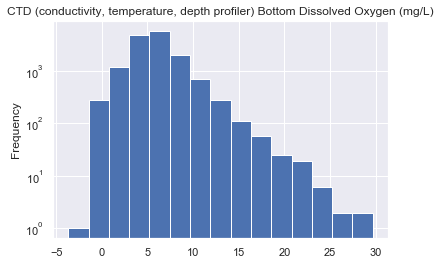

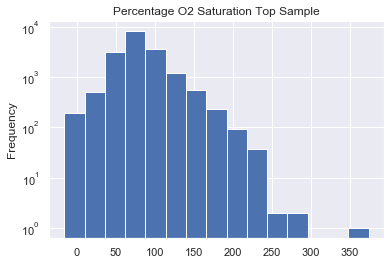

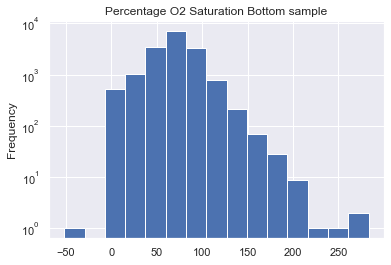

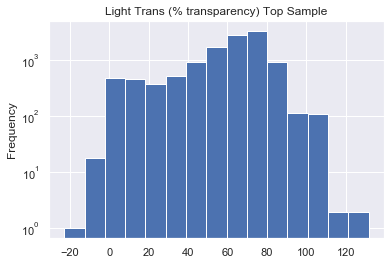

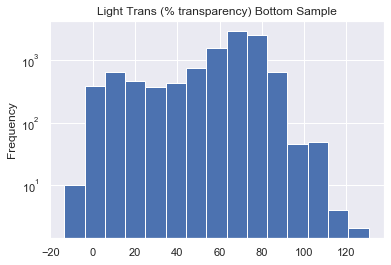

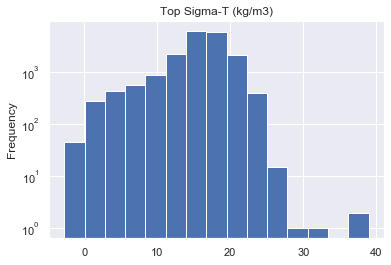

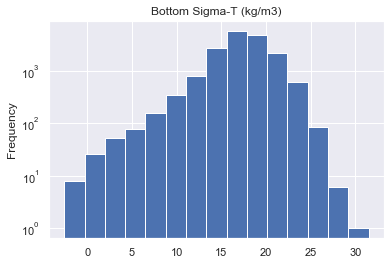

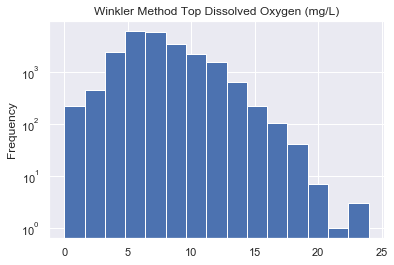

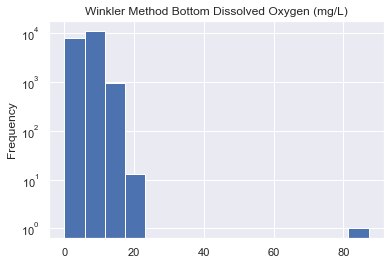

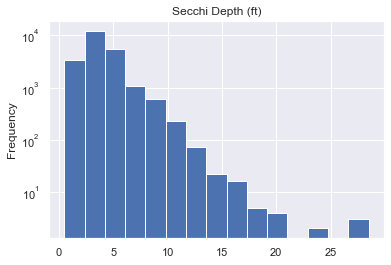

In [11]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values:
Percentage O2 Sat Top (max), Percentage O2 Bottom (min, max), Top sigma (max),  Winkler Method Bottom DO (max)

In [12]:
wq_df.nlargest(10, 'Percentage O2 Saturation Top Sample')['Percentage O2 Saturation Top Sample']

14558    374.22
19702    293.39
16142    275.99
5848     256.13
9093     251.64
17089    241.02
22433    239.78
12420    238.83
13192    237.21
28383    236.75
Name: Percentage O2 Saturation Top Sample, dtype: float64

Despite being an exceedingly high measurement, dissolved oxygen can have wildly different values, so I will keep this outlier as well.

In [13]:
wq_df.nlargest(10, 'Percentage O2 Saturation Bottom sample')['Percentage O2 Saturation Bottom sample']

23223    283.24
16431    266.24
433      240.04
11395    230.27
17216    214.18
7576     214.13
23235    210.53
17667    210.06
15887    208.71
3130     205.37
Name: Percentage O2 Saturation Bottom sample, dtype: float64

In [14]:
wq_df.nsmallest(10, 'Percentage O2 Saturation Bottom sample')['Percentage O2 Saturation Bottom sample']

24349   -51.67
5848     -6.05
2650     -5.91
10865    -4.23
6007     -3.07
19069    -1.27
4012     -0.78
12440    -0.41
21475    -0.38
7023     -0.28
Name: Percentage O2 Saturation Bottom sample, dtype: float64

The same applies to this bottom sample as the top.

In [15]:
wq_df.nlargest(10, 'Top Sigma-T (kg/m3)')['Top Sigma-T (kg/m3)']

9413     38.94
23244    38.52
14813    33.20
4631     28.21
2403     27.17
18527    26.90
5112     26.62
6455     26.09
282      25.93
9736     25.82
Name: Top Sigma-T (kg/m3), dtype: float64

While high, these values appear to be outliers and not input errors.

In [16]:
wq_df.nlargest(25, 'Winkler Method Bottom Dissolved Oxygen (mg/L)')['Winkler Method Bottom Dissolved Oxygen (mg/L)']

28031    87.21
22915    20.02
3322     19.98
3391     19.96
25       19.49
22257    19.34
2692     19.27
8935     18.59
10297    18.57
18088    18.50
16150    18.01
8481     17.71
7402     17.70
14905    17.54
18913    17.42
10656    17.41
10778    17.37
7463     17.32
19288    17.21
18300    17.20
14100    17.06
21582    16.99
16176    16.97
8509     16.89
21913    16.89
Name: Winkler Method Bottom Dissolved Oxygen (mg/L), dtype: float64

In [17]:
wq_df.at[28031, 'Winkler Method Bottom Dissolved Oxygen (mg/L)'] = 8.72

In [18]:
wq_df_int_subset = wq_df_int.iloc[:, 20:30]
wq_df_int_subset.describe()

,Top PH,Bottom PH,Top Fecal Coliform Bacteria (Cells/100mL),Top Enterococci Bacteria (Cells/100mL),Top Nitrate/Nitrite (mg/L),Top Ammonium (mg/L),Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L)
count,27625.000000,20673.000000,28862.000000,28903.000000,28602.000000,28574.000000,19297.000000,28533.000000,28507.000000,28554.000000
mean,7.649962,7.624497,2508.636096,463.049614,0.388856,0.452576,0.165340,1.183278,2.151428,0.249150
std,0.557454,0.574186,15523.986296,5052.267825,0.566747,0.918426,0.275925,1.865418,2.331622,0.330311
min,0.330000,0.000000,0.000000,0.000000,0.001000,0.002000,0.000000,0.033000,0.014000,0.009000
25%,7.400000,7.400000,11.000000,2.000000,0.179000,0.193000,0.070000,0.608000,1.020000,0.129000
50%,7.620000,7.600000,50.000000,6.000000,0.304000,0.315000,0.115000,0.858000,1.697000,0.181000
75%,7.870000,7.830000,264.000000,32.000000,0.438000,0.472000,0.164000,1.270000,2.540000,0.258000
max,78.000000,75.000000,200000.000000,200000.000000,12.100000,29.000000,5.210000,44.800000,28.834000,15.500000


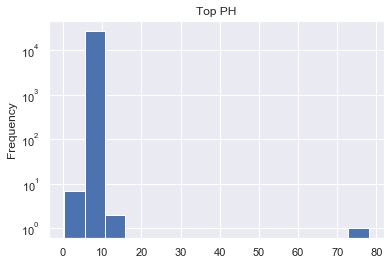

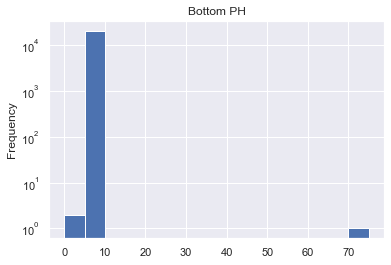

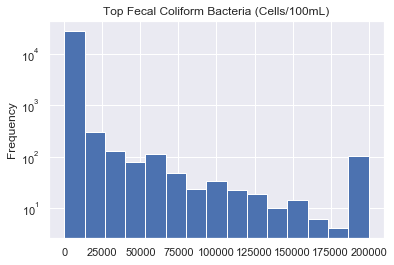

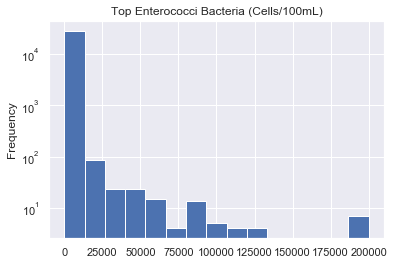

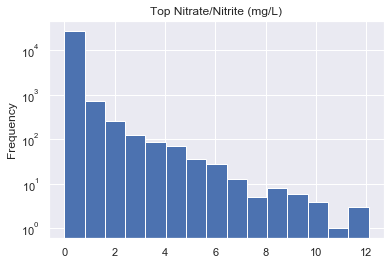

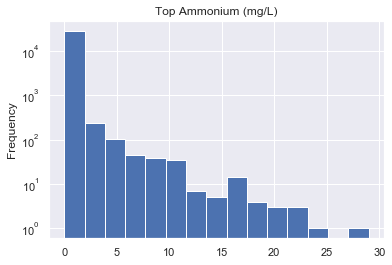

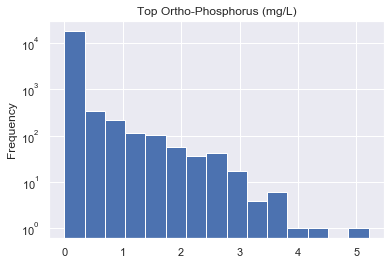

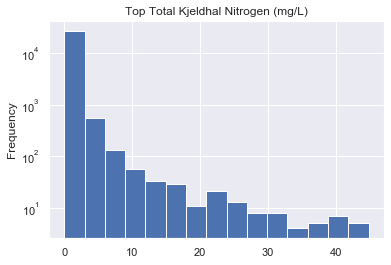

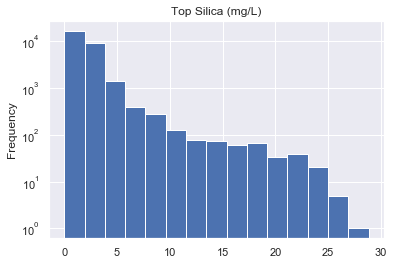

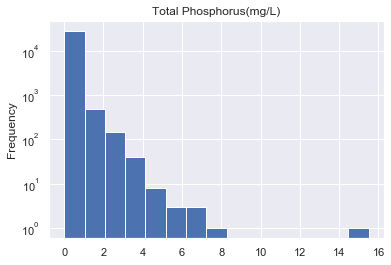

In [19]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values: Top pH (max), Bottom pH (max), Top Fecal (max), Top Enterococci (max), Total Phosphorous (max)

In [20]:
wq_df.nlargest(5, 'Top PH')['Top PH']

25444    78.00
1032     11.34
11150    11.16
25683     9.52
20573     9.11
Name: Top PH, dtype: float64

In [21]:
wq_df.at[25444, 'Top PH'] = 7.80

In [22]:
wq_df.nlargest(10, 'Bottom PH')['Bottom PH']

25344    75.00
21549     8.96
16150     8.92
13185     8.90
3130      8.88
10778     8.85
26864     8.84
30593     8.84
18090     8.83
12230     8.82
Name: Bottom PH, dtype: float64

In [23]:
wq_df.at[25344, 'Bottom PH'] = 7.50

In [24]:
wq_df.nlargest(25, 'Top Enterococci Bacteria (Cells/100mL)')['Top Enterococci Bacteria (Cells/100mL)']

2907     200000.0
3423     200000.0
8761     200000.0
11484    200000.0
18824    200000.0
13595    196000.0
13717    192000.0
22908    127000.0
2855     124000.0
22245    122000.0
17725    121000.0
20383    115000.0
776      112000.0
19834    110000.0
20859    110000.0
1617     106000.0
17763    104000.0
19567    104000.0
13619    103000.0
214      100000.0
6291      92000.0
22262     91000.0
14338     90000.0
19626     88000.0
22392     88000.0
Name: Top Enterococci Bacteria (Cells/100mL), dtype: float64

Values don't appear to be errors.

In [25]:
wq_df.nlargest(25, 'Total Phosphorus(mg/L)')['Total Phosphorus(mg/L)']

5735     15.500
10660     7.389
720       7.050
10641     6.900
16253     6.360
13518     5.630
24217     5.600
15119     5.500
8907      5.162
10049     4.830
12986     4.611
17663     4.520
23060     4.310
20497     4.300
24183     4.190
9011      4.167
17727     4.100
25763     3.989
3970      3.970
3079      3.960
25468     3.906
14472     3.900
19213     3.840
9410      3.810
2532      3.776
Name: Total Phosphorus(mg/L), dtype: float64

In [26]:
wq_df.iloc[5735]

Sampling Location                                                                                 HC2
Sample Date                                                                       2011-06-27 00:00:00
Sample Time                                                                                  12:06:00
Weather Condition (Dry or Wet)                                                                      D
Top Sample Temperature (ºC)                                                                       NaN
Bottom Sample Temperature (ºC)                                                                    NaN
Site Actual Depth (ft)                                                                            7.4
Top Sample Depth(ft)                                                                              NaN
Bottom Sample Depth (ft)                                                                          NaN
Top Salinity  (psu)                                                               

Based on other measurements from this sampling event, this value does not appear to be an input error.

In [27]:
wq_df_int_subset = wq_df_int.iloc[:, 30:]
wq_df_int_subset.describe()

,Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L),Top Dissolved Organic Carbon (mg/L),Long,Lat
count,28503.000000,20709.000000,28474.000000,27732.000000,31003.000000,31003.000000
mean,14.555029,17.591278,16.219485,3.359917,-73.929836,40.691136
std,18.827639,21.909812,25.121986,1.290050,0.117710,0.100272
min,0.000000,0.000000,0.090000,0.500000,-74.258833,40.484500
25%,7.000000,7.400000,2.650000,2.700000,-73.989073,40.627000
50%,11.000000,12.000000,6.780000,3.200000,-73.899833,40.666667
75%,18.000000,21.000000,19.600000,3.800000,-73.847613,40.782500
max,1805.000000,704.400000,770.000000,97.000000,-73.751008,40.914500


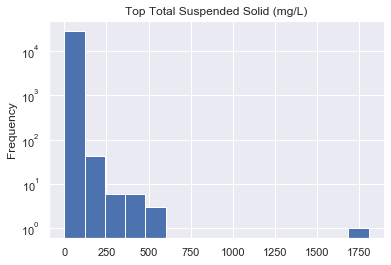

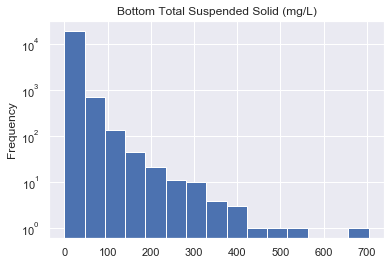

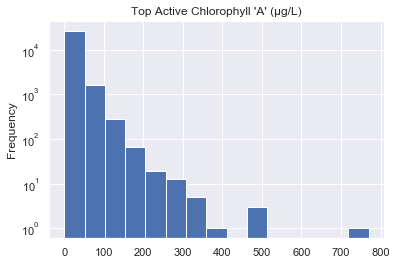

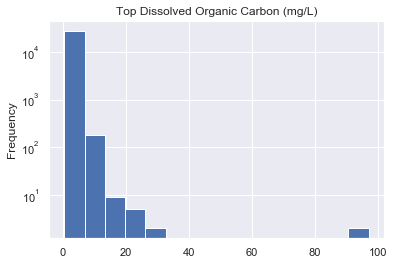

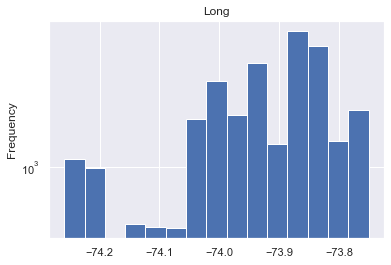

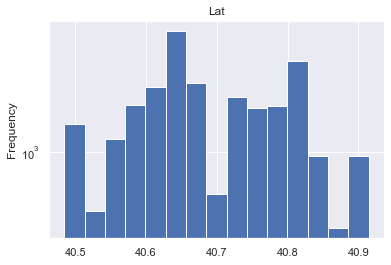

In [28]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values: Top TSS (max), Bottom TSS (max), Top Actiive Chlorophyll (max), Top Dissolved Organic Carbon

In [29]:
wq_df.nlargest(5, 'Top Total Suspended Solid (mg/L)')['Top Total Suspended Solid (mg/L)']

2843     1805.0
11396     536.0
1927      535.0
1412      488.0
18597     442.0
Name: Top Total Suspended Solid (mg/L), dtype: float64

In [30]:
wq_df = wq_df.drop(index=2843)

In [31]:
wq_df.nlargest(25, 'Bottom Total Suspended Solid (mg/L)')['Bottom Total Suspended Solid (mg/L)']

2450     704.4
22987    527.5
4352     482.0
600      442.0
10874    388.0
7348     386.0
18128    376.0
25873    345.0
9864     343.0
7679     338.8
2108     338.0
13064    327.0
951      326.6
13317    322.0
8569     320.0
8707     307.0
20507    306.8
9560     296.0
23541    289.0
8558     288.5
4488     288.0
16500    277.5
25225    276.0
13729    272.5
27787    257.0
Name: Bottom Total Suspended Solid (mg/L), dtype: float64

Kept this max

In [32]:
wq_df.nlargest(5, 'Top Active Chlorophyll \'A\' (µg/L)')['Top Active Chlorophyll \'A\' (µg/L)']

12907    770.00
20323    480.56
27708    466.00
29637    466.00
21918    404.70
Name: Top Active Chlorophyll 'A' (µg/L), dtype: float64

In [33]:
wq_df.nlargest(5, 'Top Dissolved Organic Carbon (mg/L)')['Top Dissolved Organic Carbon (mg/L)']

573      97.0
23319    95.8
28698    26.3
29676    26.3
28329    25.3
Name: Top Dissolved Organic Carbon (mg/L), dtype: float64

In [34]:
wq_df = wq_df.drop(index=[573, 23319])

In [35]:
wq_df.reset_index(drop=True, inplace=True)

In [36]:
row_lengths = defaultdict(int)

for i, row in wq_df.iterrows():
    row_lengths[row.notnull().sum()] += 1

<BarContainer object of 37 artists>

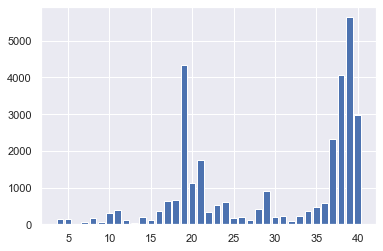

In [37]:
plt.bar(x=row_lengths.keys(), height=row_lengths.values())

I want to use only rows with at least 30 columns complete. This is to prevent my data from being overloaded with imputed data.

In [38]:
for i, row in wq_df.iterrows():
    if row.notnull().sum() < 30:
        wq_df = wq_df.drop(index=i)

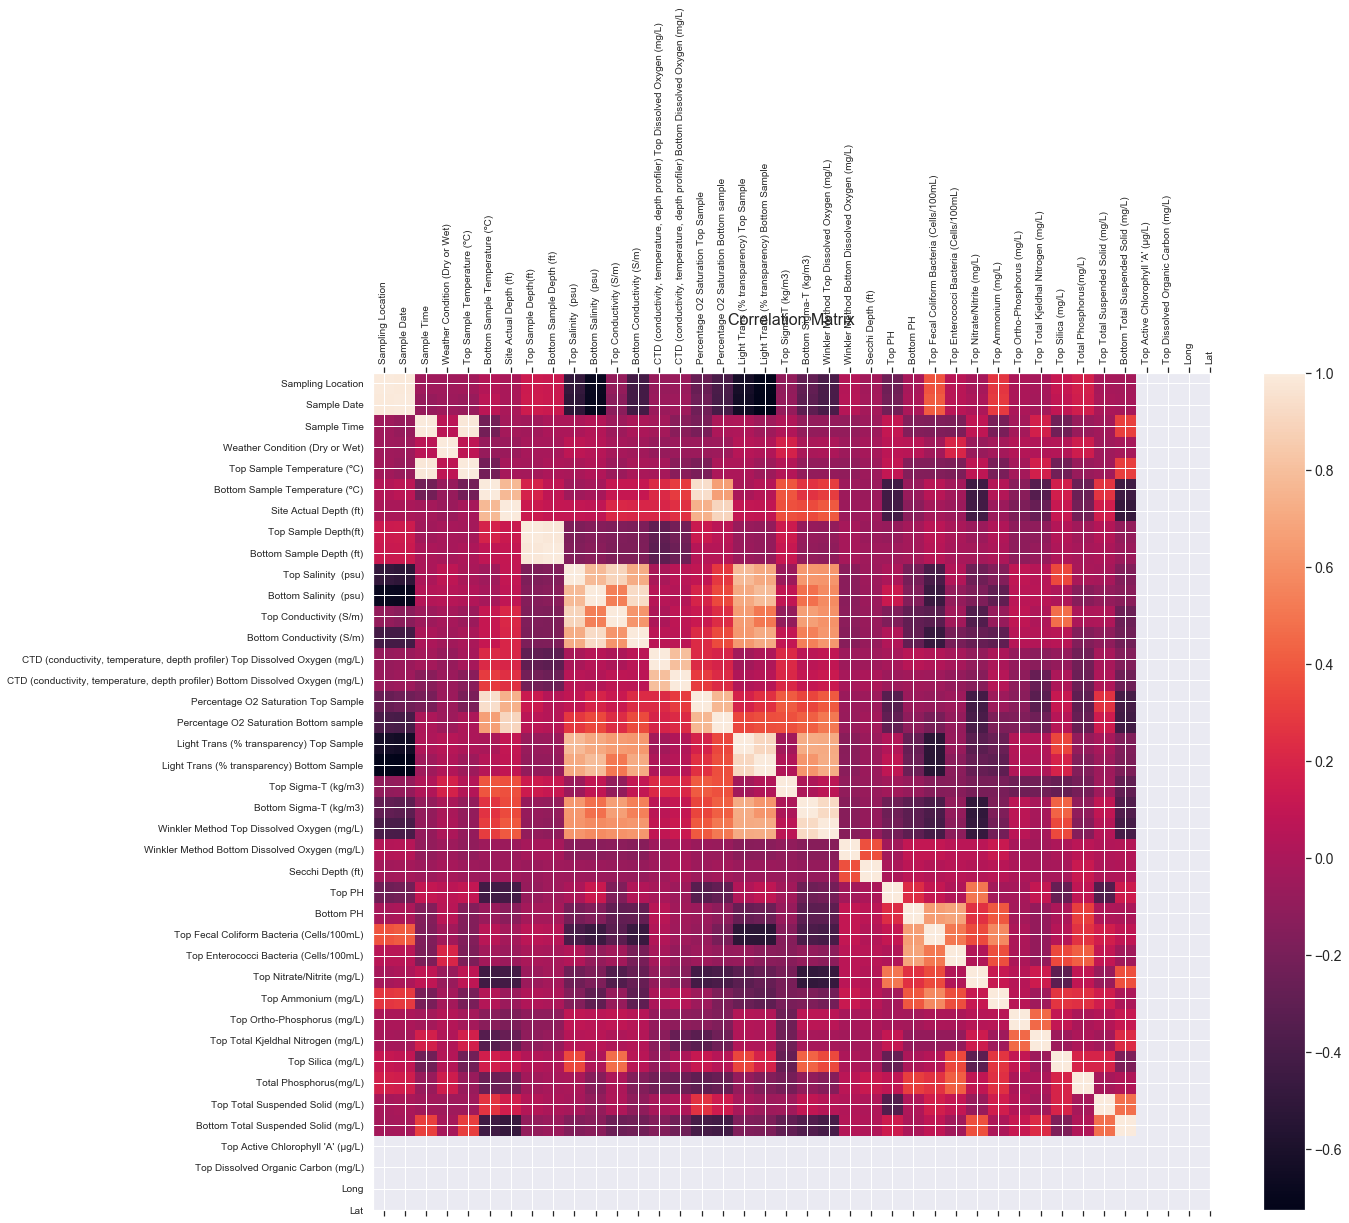

In [39]:
f = plt.figure(figsize=(19,15))
_ = plt.matshow(wq_df.corr(), fignum=f.number)
_ = plt.xticks(range(wq_df.shape[1]), wq_df.columns, fontsize=10, rotation=90)
_ = plt.yticks(range(wq_df.shape[1]), wq_df.columns, fontsize=10)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)
_ = plt.title('Correlation Matrix', fontsize=16)
_ = plt.show()

In [40]:
dry_df = wq_df[wq_df['Weather Condition (Dry or Wet)'] == 'D']
wet_df = wq_df[wq_df['Weather Condition (Dry or Wet)'] == 'W']

In [41]:
dry_df.corr()

,Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),Bottom Salinity (psu),Top Conductivity (S/m),Bottom Conductivity (S/m),"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)",...,Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L),Top Dissolved Organic Carbon (mg/L),Long,Lat
Top Sample Temperature (ºC),1.000000,0.987511,-0.034140,-0.056623,-0.029687,0.040407,0.005864,0.125305,0.120177,-0.440489,...,0.378021,0.076125,-0.012181,0.267895,0.018558,-0.004717,0.131084,0.205582,-0.006320,-0.004211
Bottom Sample Temperature (ºC),0.987511,1.000000,-0.063947,-0.062147,-0.060289,0.075590,0.002193,0.133803,0.123430,-0.466956,...,0.408323,0.072180,0.018608,0.282854,0.027301,-0.008163,0.113876,0.193894,0.007318,-0.002360
Site Actual Depth (ft),-0.034140,-0.063947,1.000000,0.073209,0.981886,-0.220672,-0.024171,-0.032626,0.004290,-0.030678,...,-0.155876,-0.170918,0.088883,-0.196598,-0.025883,0.172209,-0.231830,-0.055064,-0.035589,0.316776
Top Sample Depth(ft),-0.056623,-0.062147,0.073209,1.000000,0.081582,-0.066363,-0.049910,-0.000517,0.003590,0.076421,...,-0.025784,0.181719,-0.053981,-0.024622,0.003035,0.005556,0.007902,0.151941,-0.056636,-0.015733
Bottom Sample Depth (ft),-0.029687,-0.060289,0.981886,0.081582,1.000000,-0.213001,-0.016987,-0.021905,0.014223,-0.035775,...,-0.153681,-0.170031,0.083105,-0.197127,-0.027942,0.174393,-0.231932,-0.057003,-0.035957,0.309519
Top Salinity (psu),0.040407,0.075590,-0.220672,-0.066363,-0.213001,1.000000,0.783146,0.188350,0.095008,-0.032517,...,0.064403,-0.020786,-0.430593,0.037120,-0.120534,-0.336929,0.166790,-0.259008,0.255926,-0.447464
Bottom Salinity (psu),0.005864,0.002193,-0.024171,-0.049910,-0.016987,0.783146,1.000000,0.133729,0.105714,0.078200,...,-0.013850,-0.055314,-0.416569,-0.067963,-0.176898,-0.271251,0.114107,-0.227059,0.147014,-0.495844
Top Conductivity (S/m),0.125305,0.133803,-0.032626,-0.000517,-0.021905,0.188350,0.133729,1.000000,0.982668,-0.169228,...,0.065803,-0.000803,-0.064907,0.026697,-0.108489,-0.104747,0.036211,-0.034270,0.062354,-0.072338
Bottom Conductivity (S/m),0.120177,0.123430,0.004290,0.003590,0.014223,0.095008,0.105714,0.982668,1.000000,-0.163207,...,0.052700,-0.007245,-0.028961,0.009453,-0.111160,-0.074592,0.016013,-0.011550,0.034525,-0.046182
"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)",-0.440489,-0.466956,-0.030678,0.076421,-0.035775,-0.032517,0.078200,-0.169228,-0.163207,1.000000,...,-0.364175,0.034186,-0.241054,-0.109480,0.086089,0.045706,0.366302,0.002712,0.007226,-0.169270


In [42]:
wet_df.corr()

,Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),Bottom Salinity (psu),Top Conductivity (S/m),Bottom Conductivity (S/m),"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)",...,Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L),Top Dissolved Organic Carbon (mg/L),Long,Lat
Top Sample Temperature (ºC),1.000000,0.990576,-0.059041,-0.008890,-0.045338,0.031252,-0.012488,0.162459,0.148354,-0.578776,...,0.396079,0.036239,-0.022993,0.285329,-0.029532,-0.039025,0.081416,0.112772,-0.021547,-0.046356
Bottom Sample Temperature (ºC),0.990576,1.000000,-0.086090,-0.018943,-0.072856,0.060871,-0.013404,0.173123,0.154318,-0.601765,...,0.421243,0.030067,0.006525,0.298745,-0.034028,-0.053017,0.063425,0.105964,-0.012822,-0.048765
Site Actual Depth (ft),-0.059041,-0.086090,1.000000,0.055730,0.983742,-0.201186,-0.019286,-0.029775,0.007999,0.085720,...,-0.168246,-0.187292,0.081673,-0.181329,-0.005918,0.184510,-0.201840,-0.096735,-0.040546,0.314889
Top Sample Depth(ft),-0.008890,-0.018943,0.055730,1.000000,0.074000,-0.091602,-0.086143,-0.025939,-0.019161,0.101871,...,-0.058611,0.255256,-0.084434,-0.024019,0.100101,0.055605,0.124767,0.161874,-0.012154,-0.014798
Bottom Sample Depth (ft),-0.045338,-0.072856,0.983742,0.074000,1.000000,-0.194418,-0.013520,-0.020578,0.016138,0.075881,...,-0.161098,-0.179839,0.072284,-0.180682,0.000193,0.185183,-0.199384,-0.093163,-0.047709,0.300479
Top Salinity (psu),0.031252,0.060871,-0.201186,-0.091602,-0.194418,1.000000,0.761114,0.179278,0.075284,-0.056415,...,0.046662,-0.050001,-0.433264,0.042823,-0.143709,-0.332493,0.165653,-0.229063,0.301727,-0.397101
Bottom Salinity (psu),-0.012488,-0.013404,-0.019286,-0.086143,-0.013520,0.761114,1.000000,0.141461,0.120982,0.140346,...,-0.034272,-0.054861,-0.414226,-0.032009,-0.164705,-0.254571,0.135091,-0.182459,0.201461,-0.448198
Top Conductivity (S/m),0.162459,0.173123,-0.029775,-0.025939,-0.020578,0.179278,0.141461,1.000000,0.980009,-0.156985,...,0.082877,-0.003287,-0.037324,0.038727,-0.097650,-0.104324,0.052862,-0.026425,-0.026226,-0.134505
Bottom Conductivity (S/m),0.148354,0.154318,0.007999,-0.019161,0.016138,0.075284,0.120982,0.980009,1.000000,-0.131793,...,0.068049,-0.002658,-0.001096,0.024164,-0.091926,-0.073259,0.030711,-0.004554,-0.059427,-0.106581
"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)",-0.578776,-0.601765,0.085720,0.101871,0.075881,-0.056415,0.140346,-0.156985,-0.131793,1.000000,...,-0.434497,0.015753,-0.215218,-0.207348,0.111822,0.085191,0.281540,0.004394,-0.068523,-0.129639
